# How does Brasil compares to other nations when it comes to co2 emission in energy production ?

On this work i will investigate polution and energy in my country, how does it compares to main global economies, and where does it stands on world wide range of most pollutant.

###### dataset 1: energy data across the globe:
https://github.com/owid/energy-data

###### dataset 2: brasilian energy sources:
https://dados.gov.br/dataset/geracao-por-fonte/resource/e603393e-8829-429d-b800-22a9feb0009d

###### dataset 3: co2 data
https://github.com/owid/co2-data

### which countries polute more?

In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

plt.subplot?

In [4]:
co2 = pd.read_csv("owid-co2-data.csv")
global_energy = pd.read_csv("owid-energy-data.csv")
br_energy = pd.read_csv("GeracaoFonte.csv")

co2.head()

FileNotFoundError: [Errno 2] No such file or directory: 'owid-co2-data.csv'

In [ ]:
global_energy.head()

In [ ]:
br_energy.head()

###  Total carbon emission per country

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#in theory we could use the variable total ghg to find the countries most polutant.
#but as you can see there are many nan!
print(co2['total_ghg'])
#the other option is to manually sum every column to get total ghg emiision per country.

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
23703    67.49
23704    65.98
23705      NaN
23706      NaN
23707      NaN
Name: total_ghg, Length: 23708, dtype: float64


crescimento das emissões por país ao longo dos anos. qual país cresce mais?


In [7]:
'''
here i make a single column with the sum of tham all
variables to sum:
co2, cement_co2, coal_co2, flaring_co2, gas_co2, oil_co2,
other_industry_co2, methane, nitrous_oxide
'''
mylist = ["co2", "cement_co2", "coal_co2", "flaring_co2", "gas_co2",
        "oil_co2", "other_industry_co2", "methane","nitrous_oxide" ]
co2['ghg'] = co2[ mylist ].sum(axis=1)

<IPython.core.display.Javascript object>


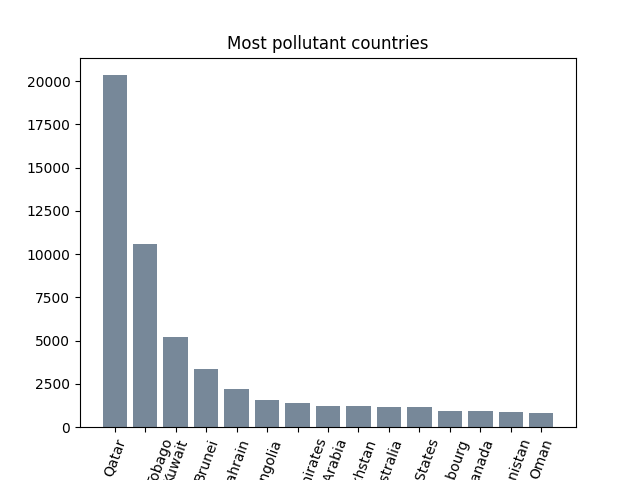

Text(0.5, 1.0, 'Most pollutant countries')

In [8]:
#finding the most polutant countries in the world, when it comes to
#total greenhause gases emission.
#why is it erasing part of the name ????

co2_19 = co2[ co2['year'] == 2019 ]
car = co2_19.sort_values(['ghg'], ascending = False)
car = car[ car['iso_code'].notnull() ]
car = car[1:16]
ind = car.index
most = co2_19.loc[list(ind)] 
bar = plt.bar( range(15) , most['ghg'],  align='center', linewidth=0, color='lightslategrey')
plt.xticks( np.arange(len(car)), car['country'] , rotation=75 )
poluentes = car['country']
plt.title("Most pollutant countries")

In [9]:
co2['ghg_pc']=co2['ghg']*1000000/co2['population']
print(co2['ghg_pc'])

0        0.003915
1        0.021672
2        0.023469
3        0.023185
4        0.026368
           ...   
23703    3.104596
23704    2.858161
23705    1.439489
23706    1.570815
23707    1.416729
Name: ghg_pc, Length: 23708, dtype: float64


In [10]:
#Here i remove countries that are merely territories from bigger countries
to_remove = [ 'New Caledonia', 'Sint Maarten (Dutch part)', 'Faeroe Islands' ]
#car.drop( to_remove,axis=0, inplace=True )


co2_19 = co2[ co2['year'] == 2019 ]
car = co2_19.sort_values(['ghg_pc'], ascending = False)
car = car[ car['iso_code'].notnull() ]
car = car[ ~car['country'].isin( to_remove ) ]
car = car[0:15]
ind = car.index
most = co2_19.loc[list(ind)] 
bar = plt.bar( range(15) , most['ghg_pc'],  align='center', linewidth=0, color='lightslategrey')
plt.xticks( np.arange(len(car)), car['country'] , rotation=70 )
poluentes_pc =  car['country']

In [11]:
#this query was removed because there are too many missing values in the dataset
'''
#global_energy['carbon_intensity_elec']
ener20 = global_energy[ global_energy['year']==2020 ]
ener20=ener20.sort_values(['carbon_intensity_elec'], ascending=False)
print(pd.unique(ener20['country']))
print( ener20['carbon_intensity_elec'] )
ener20=ener20[0:15]
ind=ener20.index
most=ener20.loc[list(ind)]
bar = plt.bar( range(15), most['carbon_intensity_elec'], align = 'center',linewidth=0, color='lightslategrey' )
plt.xticks( range(15), ener20['country'], rotation=65 )
'''

"\n#global_energy['carbon_intensity_elec']\nener20 = global_energy[ global_energy['year']==2020 ]\nener20=ener20.sort_values(['carbon_intensity_elec'], ascending=False)\nprint(pd.unique(ener20['country']))\nprint( ener20['carbon_intensity_elec'] )\nener20=ener20[0:15]\nind=ener20.index\nmost=ener20.loc[list(ind)]\nbar = plt.bar( range(15), most['carbon_intensity_elec'], align = 'center',linewidth=0, color='lightslategrey' )\nplt.xticks( range(15), ener20['country'], rotation=65 )\n"

## Use of clean energy in my country

On last decades the clean energy tecnologies has become cheaper. Let's check if this caused an increase in its use (%).

In [14]:
br_energy.drop('ideGeracaoFonte', axis=1, inplace=True)
br_energy.head()
anos = br_energy['anoReferencia'].unique()
fontes = br_energy['nomFonteGeracao'].unique()

###### As we can seeall types of energy have increase. But even though the clean energy increased the final (%) of total clean energy has decreased, on this time period.

<IPython.core.display.Javascript object>


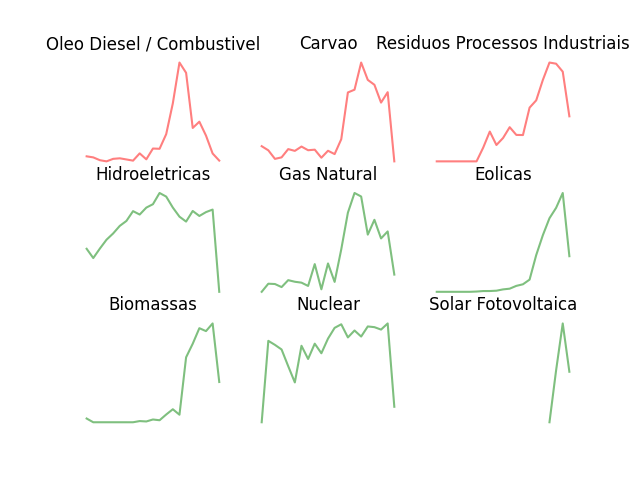

In [15]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, frameon= False )
sp = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
sujas=['Oleo Diesel / Combustivel','Carvao','Residuos Processos Industriais']

for i in range(3):
    #plt.subplot(3, 3, i+1, frameon=False)
    #plt.title(sujas[i])
    data = br_energy[br_energy['nomFonteGeracao']==sujas[i]]
    data = data.groupby('anoReferencia')['mdaEnergiaDespachadaGWh'].sum()
    # remove all the ticks (both axes), and tick labels on the Y axis
    sp[i].title.set_text(sujas[i])
    sp[i].plot( data.index, data.values, 'r-', alpha=0.5 )

limpas = ['Hidreletricas exclusive Itaipu', 'Gas Natural', 'Eolicas', 'Biomassas', 'Nuclear', 'Solar Fotovoltaica']

for i in range(1, 6, 1):
    #plt.subplot(3, 3, i+4, frameon=False)
    #plt.title(limpas[i])
    data = br_energy[br_energy['nomFonteGeracao']==limpas[i]]
    data = data.groupby('anoReferencia')['mdaEnergiaDespachadaGWh'].sum()
    sp[i+3].title.set_text(limpas[i])
    sp[i+3].plot( data.index, data.values, 'g-', alpha=0.5 )

ax4.title.set_text('Hidroeletricas')
data = br_energy[(br_energy['nomFonteGeracao']=='Hidreletricas exclusive Itaipu')|(br_energy['nomFonteGeracao']=='Itaipu')]
data = data.groupby('anoReferencia')['mdaEnergiaDespachadaGWh'].sum()
ax4.plot( data.index, data.values, 'g-', alpha=0.5 )

for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(False)

# remove the x and y ticks
for ax in sp:
    #ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

## Brasil versus World's average

<IPython.core.display.Javascript object>


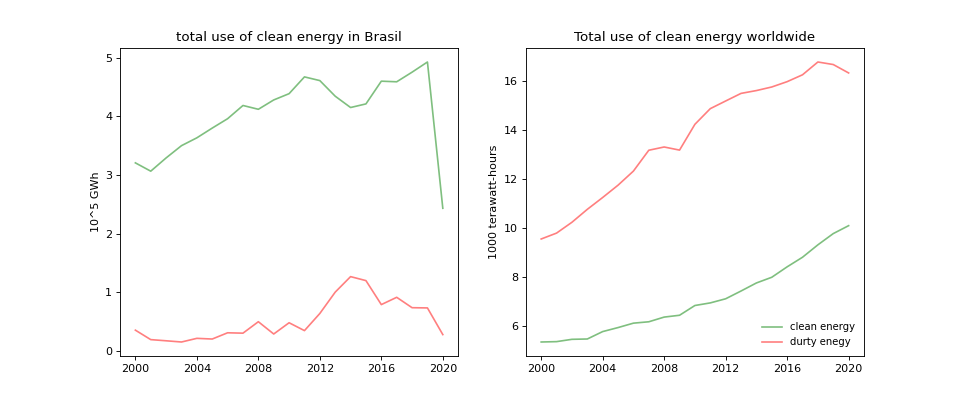

In [19]:
titles_clean_ener = ['Solar Fotovoltaica','Nuclear', 'Biomassas', 'Eolicas', 'Hidreletricas exclusive Itaipu', 'Itaipu' ]

notclean_br = (br_energy[ ~br_energy[ 'nomFonteGeracao' ].isin(titles_clean_ener) ]
    .groupby('anoReferencia')['mdaEnergiaDespachadaGWh']
    .sum())

clean_br = (br_energy[ br_energy[ 'nomFonteGeracao' ].isin(titles_clean_ener) ]
    .groupby('anoReferencia')['mdaEnergiaDespachadaGWh']
    .sum())

fig = figure(figsize=(12, 5), dpi=80)
ax1 = plt.subplot( 1, 2, 1, frameon=True )
ax1.plot( clean_br.index, clean_br.values/100000, 'g-', alpha=0.5 )
ax1.plot( notclean_br.index, notclean_br.values/100000, 'r-', alpha=0.5 )
ax1.title.set_text('total use of clean energy in Brasil')
ax1.set_ylabel('10^5 GWh')
ax1.set_xticks(range(2000, 2021, 4))

#apesar de o uso de energias limpas aindaser maior no brasil vemos que o uso de energias sujas cresce
#mais do que o das limpas
#restrict my global data so i will use only the same years as Brasil's data
global_energy = global_energy[global_energy['year'].isin(anos)]
world = global_energy[global_energy['country']=='World']
world.set_index('year', inplace=True)

durty_en = [
    'biofuel_electricity',
    'coal_electricity',
    #'fossil_electricity',
    'gas_electricity',
    'oil_electricity'
]

clean_en =[
    'hydro_electricity',
    'nuclear_electricity',
    'other_renewable_electricity',
    'solar_electricity',
    'wind_electricity'
]

clean_world = world[ clean_en ].sum(axis=1)
notclean_world = world[ durty_en ].sum(axis=1)
ax2 = plt.subplot( 1, 2, 2,frameon=True )
ax2.plot(clean_world.index, clean_world.values/1000, 'g-', alpha=0.5 )
ax2.plot( notclean_world.index, notclean_world.values/1000, 'r-', alpha=0.5 )
#lt.legend( ['clean energy', 'durty enegy'], prop={'size':12} ,loc=4, frameon=False, title='Legend')
ax2.title.set_text('Total use of clean energy worldwide')
ax2.set_ylabel('1000 terawatt-hours')
ax2.set_xticks(range(2000, 2021, 4))

#plt.legend(handles=[p1, p2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-small')
plt.legend(['clean energy','durty enegy'], prop={'size':9} ,loc='lower right', frameon=False, bbox_to_anchor=(1, 0))

## Brasil versus the other countries countries that most produce energy

<IPython.core.display.Javascript object>


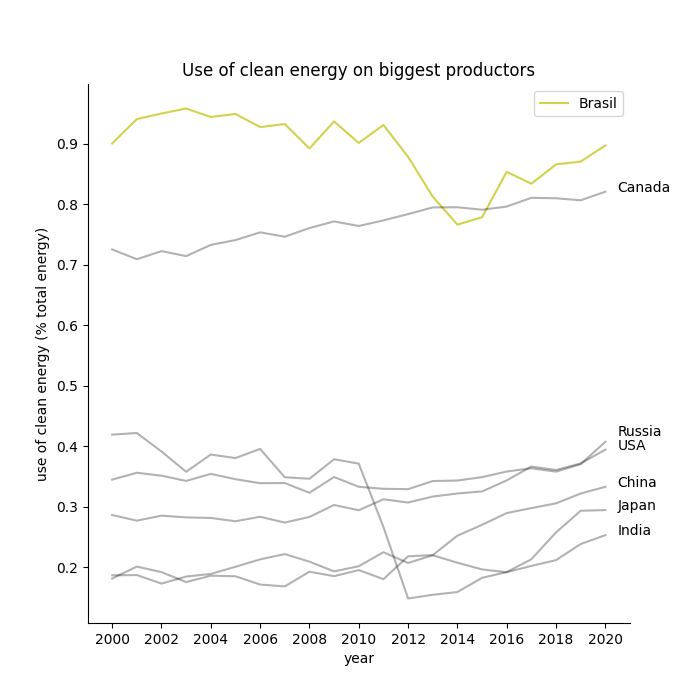

Text(0.5, 1.0, 'Use of clean energy on biggest productors')

In [20]:
perc_brasil = (clean_br)/(clean_br+notclean_br)
perc_world = (clean_world)/(clean_world+notclean_world)

#TODO: add anotation on the side with ax.annotate()
#fig, (ax1,ax2) = plt.subplots(1,2, sharex=True, sharey=True, frameon=True)

#fig, ax= plt.figure(figsize=(7,7), dpi=80)
fig, ax = plt.subplots(1, figsize = (7,7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.plot(perc_brasil.index, perc_brasil.values, 'y-', alpha=0.7)
plt.legend(['Brasil'])
#plt.plot(perc_world.index, perc_world.values, 'k-', alpha=0.3)
plt.ylabel('use of clean energy (% total energy)')
plt.xticks(range(2000, 2021, 2))
plt.xlabel('year')

#Electricity generation, measured in terawatt-hours
global_energy['electricity_generation']

#add more countries
#achar os países que mais produzem e consomem energia
global_energy['iso_code'] = global_energy['iso_code'].astype(str)
data2020 = global_energy[ global_energy['year'] == 2020 ]
car = data2020.sort_values(['electricity_generation'], ascending = False)
car = car[ (car['iso_code'] != 'OWID_WRL') & (car['iso_code'] != 'nan') ]
car = car[0:6]
maiores = car['country']
maiores

coord = []

#E se eu trocar os mais poluentes pelos que usamou produzem mais energia no mundo ?
for country_name in maiores:
    country_data = global_energy[global_energy['country']== country_name ]
    country_data.set_index('year', inplace=True)
    clean_en_country = country_data[ clean_en ].sum(axis=1)
    not_clean_en_country = country_data[ durty_en ].sum(axis=1)
    perc = clean_en_country/(clean_en_country+not_clean_en_country)
    coord.append(perc[2020])
    plt.plot( perc.index, perc.values, 'k-', alpha=0.3 )


'''
ax.annotate('local max', xy=(0.3 ,2010),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

'''

maiores.iloc[1] = 'USA'

labels = maiores.reset_index().drop('index', axis=1)
labels.loc[7] = ['World']
for country_name, i in zip(maiores, coord ):
    if(country_name == 'Russia'):
        ax.annotate( country_name, xy=(2020,i),xytext = (2020.5,i+0.01),xycoords='data',textcoords='data' )
#   elif country_name == ' United States' :
#       pass
#       ax.annotate( 'USA', xy=(2020,i),xytext = (2020.5,i-0.01),xycoords='data',textcoords='data' )
    else:
        ax.annotate( country_name, xy=(2020,i),xytext = (2020.5,i),xycoords='data',textcoords='data' )
#           arrowprops=dict(facecolor='black', arrowstyle="->",  connectionstyle="arc3" ),
#           horizontalalignment='right',
#              ) +0.5  
    

ax.set_title('Use of clean energy on biggest productors')

In [ ]:
#IDEA: bar plot da principal fonte de poluição de cada país dos mais poluentes
#em tese, seria sempre o petróleo.
#já foram encontrados na primeira parte:

In [ ]:
#TO-DO: comparar com as maiores economias do mundo